# Climate Change: Micro Analysis of Emissions and Resulting Atmospheric CO2 Concentrations

It is now well established in popular science that the burning of fossil fuels is dramatically increasing the concentration of CO2 in the earth's atmosphere. The higher CO2 concentration has resulted in a greenhouse effect which is heating the atmosphere. Further to, this warming of the atmosphere has cascaded several other environmental changes, most of which, if not all, could pose a substantial threat to humanity's well being and life on earth more generally.

Humanity's behaviours and decisions in the coming years will ultimately determine the extent of these effects. This notebook is intended to provide an overview of what that could look like. More specifically, this notebook will analyze the following:
* Key indicators of a changing climate
* The degree to which increased atmospheric CO2 concentrations are attributable to human activity
* Whether it is possible to reduce atmospheric CO2 concentrations through the implementation of sustainable technology and policy.

It should be noted that there are a number of limitations in the later part of this analysis. As such the analysis should be treated as a broad approximation to provide some intuition as to whether the climate crisis can be taken under control. These limitations and assumptions will be discussed in further detail later in this notebook.

## General Set-up
### Import Libraries
To start, the libraries necessary for the analysis will be imported.

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from sympy import symbols, solve
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Import Data
There are numerous variables that need to be considered for the proposed analysis, requiring the use of data from a number of sources.  

In the code cell below, the required data sets are imported into the notebook using the `pd.read_csv()` function. This function returns a Pandas DataFrame which will allow for convenient cleaning and manipulation of the data. Variable names given to each DataFrame are fairly indicative as to what kind of data each contains. Each dataset will be described in further detail as the data is presented, cleaned and analyzed.

In [2]:
#Load Data
temperature_data_land_avg = pd.read_csv('climate data/TemperatureData/Temp_Average_Land.txt', delimiter="\s+", names=['Year', 'Avg. Annual Anomaly', 'Avg. Annual Uncertainty', 'Avg. 5-Year Anomaly', 'Avg. 5-Year Unceratinty'], usecols=[0,1,2,3,4]) # [1]
temperature_data_land_min = pd.read_csv('climate data/TemperatureData/Temp_Min_Land.txt', delimiter="\s+", names=['Year', 'Min. Annual Anomaly', 'Min. Annual Uncertainty', 'Min. 5-Year Anomaly', 'Min. 5-Year Unceratinty'], usecols=[0,1,2,3,4]) # [2]
temperature_data_land_max = pd.read_csv('climate data/TemperatureData/Temp_Max_Land.txt', delimiter="\s+", names=['Year', 'Max. Annual Anomaly', 'Max. Annual Uncertainty', 'Max. 5-Year Anomaly', 'Max. 5-Year Unceratinty'], usecols=[0,1,2,3,4]) # [3]
temperature_data_land_ocean = pd.read_csv('climate data/TemperatureData/Temp_Land_and_Ocean.txt', delimiter="\s+", names=['Year', 'Land Annual Anomaly', 'Land Annual Unc.', 'Land Five-year Anomaly', 'Land Five-year Unc.', 'Ocean Annual Anomaly', 'Ocean Annual Unc.', 'Ocean Five-year Anomaly', 'Ocean Five-year Unc.'], usecols=[0,1,2,3,4,5,6,7,8]) # [4]

emissions_data = pd.read_csv('climate data/fossil_CO2_totals_by_country_EDGAR.csv') # [5]
emissions_data_2 = pd.read_csv('climate data/fossil_CO2_by_sector_and_country_EDGAR.csv') # [5]

co2_concentration_data = pd.read_csv('climate data/co2_annmean_mlo.csv', names=['Year', 'Concentration (ppm)', 'Uncertainty (ppm)']) # [6]
population_data = pd.read_csv('climate data/UN_population_data.csv') # [7]
population_pred_data = pd.read_csv('climate data/UN_population_predictions_med_varient.csv') # [7]

#Indicator Data
sea_level_data = pd.read_csv('climate data/sea-level_fig-1.csv') # [8] [9]

#Ocean disolved CO2 and acidity:
ocean_acid_CO2_data = pd.read_csv('climate data/ocean-acidity_fig-1.csv')

#Energy Consumption:
energy_data = pd.read_csv('climate data/owid-energy-data.csv')

emission_reduction_data = pd.read_csv('climate data/emissions_reductions.csv').set_index('Year') # [10]

## Climate Data Decriptions, Cleaning, and Overview
### Earth Temperature Data
There are four DataFrames which contain temperature data. A summary of the columns in each DataFrame is as follows:
* `temperature_data_land_avg`
    * Year: The year of the associated temperature data.
    * Avg. Annual Anomaly: The average land-surface temperature of that year expressed in Celsius and as an anomaly from the baseline (8.61 +/- 0.04 - Jan 1951-Dec 1980).
    * Avg. Annual Uncertainty: The uncertainty associated with the Avg. Annual Anomaly value expressed in Celsius.
    * Avg. 5-Year Anomaly: The average land-surface temperature of the indicated and previous 4 years expressed in Celsius and as an anomaly from the baseline (8.61 +/- 0.04 - Jan 1951-Dec 1980).
    * Avg. 5-Year Unceratinty: The uncertainty associated with the Avg. 5-Year Anomaly value expressed in Celsius.
* `temperature_data_land_min`
    * Year: The year of the associated temperature data.
    * Min. Annual Anomaly: The minimum land-surface temperature of that year expressed in Celsius and as an anomaly from the baseline (2.89 +/- 0.04 - Jan 1951-Dec 1980).
    * Min. Annual Uncertainty: The uncertainty associated with the Min. Annual Anomaly value expressed in Celsius.
    * Min. 5-Year Anomaly: The minimum land-surface temperature of the indicated and previous 4 years expressed in Celsius and as an anomaly from the baseline (2.89 +/- 0.04 - Jan 1951-Dec 1980).
    * Min. 5-Year Unceratinty: The uncertainty associated with the Min. 5-Year Anomaly value expressed in Celsius.
* `temperature_data_land_max`
    * Year: The year of the associated temperature data.
    * Max. Annual Anomaly: The maximum land-surface temperature of that year expressed in Celsius and as an anomaly from the baseline (14.46 +/- 0.13 - Jan 1951-Dec 1980).
    * Max. Annual Uncertainty: The uncertainty associated with the Max. Annual Anomaly value expressed in Celsius.
    * Max. 5-Year Anomaly: The maximum land-surface temperature of the indicated and previous 4 years expressed in Celsius and as an anomaly from the baseline (14.46 +/- 0.13 - Jan 1951-Dec 1980).
    * Max. 5-Year Unceratinty: The uncertainty associated with the Max. 5-Year Anomaly value expressed in Celsius.
* `temperature_data_land_ocean`
    * Year: The year of the associated temperature data.
    * Land Annual Anomaly: The air temperature above sea ice of that year expressed in Celsius and as an anomaly from the baseline (14.168 +/- 0.045).
    * Land Annual Unc.: The uncertainty associated with the Land Annual Anomaly value expressed in Celsius.
    * Land Five-year Anomaly: The air temperature above sea ice of the indicated and previous 4 years expressed in Celsius and as an anomaly from the baseline (14.168 +/- 0.045).
    * Land Five-year Unc.: The uncertainty associated with the Land Five-year Anomaly value expressed in Celsius.
    * Ocean Annual Anomaly: The water temperature below sea ice of that year expressed in Celsius and as an anomaly from the baseline (14.714 +/- 0.045).
    * Ocean Annual Unc.: The uncertainty associated with the Ocean Annual Anomaly value expressed in Celsius.
    * Ocean Five-year Anomaly: The water temperature below sea ice of the indicated and previous 4 years expressed in Celsius and as an anomaly from the baseline (14.714 +/- 0.045).
    * Ocean Five-year Unc.: The uncertainty associated with the Ocean Five-year Anomaly value expressed in Celsius.
    
An overview of one of these DataFrames can be useful for exploring the data further to see if any further processing is required. A good way of accomplishing this is by displaying the DataFrame as well as using the `info()` method. The `info()` method will report back the size of the dataframe, the names of the columns, and the dtype of each column. This methodology will be repeated for other DataFrames later in this notebook.

Because the DataFrames are fairly similar in structure, `temperature_data_land_avg` will be used for exploratory purposes.

In [3]:
print(temperature_data_land_avg.info())
temperature_data_land_avg

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     291 non-null    object
 1   Avg. Annual Anomaly      282 non-null    object
 2   Avg. Annual Uncertainty  282 non-null    object
 3   Avg. 5-Year Anomaly      276 non-null    object
 4   Avg. 5-Year Unceratinty  276 non-null    object
dtypes: object(5)
memory usage: 5.7+ KB
None


,Year,Avg. Annual Anomaly,Avg. Annual Uncertainty,Avg. 5-Year Anomaly,Avg. 5-Year Unceratinty
0,%,This,file,contains,a
1,%,produced,by,the,Berkeley
2,%,Celsius,and,reported,as
3,%,average.,Uncertainties,represent,the
4,%,statistical,and,spatial,undersampling
...,...,...,...,...,...
286,2016,1.437,0.035,1.221,0.038
287,2017,1.311,0.040,1.298,0.035
288,2018,1.153,0.046,1.354,0.033
289,2019,1.357,0.043,NaN,NaN


Note: The column names of the DataFrames were specified at import to make data cleaning more manageable. This is due to the inclusion of rows with text which are discussed further below.

As is clear from the output of the DataFrame, there are a number of rows of text included which acted as a description for the original file. These rows are of no value in terms of data analysis and should therefore be removed.

An unfortunate side-effect of these rows of text being included is that the columns of the DataFrame that should be of a numerical dtype are now `object` dtypes. Once the text rows are removed, the columns should be converted to the appropriate datatypes.

The function below can be used to accomplish the data cleaning tasks described above.

In [4]:
def clean_temperature_data(df):
    """
    Removes text rows and converts columns into the appropriate datatypes for a "temperature dataset" DataFrame.
    
    Arguments:
    df -- A "temperature dataset" DataFrame.
    
    Returns: 
    cleaned_df -- The "temperature dataset" DataFrame processed as described.
    """
    # Identify where numeric data starts by finding the 'header' row:
    header_index = None
    for index, value in enumerate(df.iloc[:,1]):
        if value == 'Year,':
            header_index = index
    
    # Remove non-numeric rows and convert columns to float dtype:
    cleaned_df = df.iloc[header_index+1:,:].reset_index().drop(['index'], axis=1).astype('float')
    
    # Convert 'Year' column to int dtype and set as index for dataframe:
    cleaned_df['Year'] = cleaned_df['Year'].astype('int')
    cleaned_df = cleaned_df.set_index('Year')
    
    return cleaned_df

The function can now be applied to the temperature DataFrames as is done in the code cell below. 

In [5]:
temperature_data_land_avg_cleaned = clean_temperature_data(temperature_data_land_avg)
temperature_data_land_min_cleaned = clean_temperature_data(temperature_data_land_min)
temperature_data_land_max_cleaned = clean_temperature_data(temperature_data_land_max)
temperature_data_land_ocean_cleaned = clean_temperature_data(temperature_data_land_ocean)

Temperature data within these datasets are reported as a deviation from a given baseline. To determine the absolute temperature for a given year, the baseline must be added to the values.

In [6]:
temperature_data_land_avg_cleaned['Avg. Annual Temperature (C)'] = temperature_data_land_avg_cleaned['Avg. Annual Anomaly'] + 8.60
temperature_data_land_avg_cleaned['Avg. 5-Year Temperature (C)'] = temperature_data_land_avg_cleaned['Avg. 5-Year Anomaly'] + 8.60

temperature_data_land_max_cleaned['Max. Annual Temperature (C)'] = temperature_data_land_max_cleaned['Max. Annual Anomaly'] + 14.46
temperature_data_land_max_cleaned['Max. 5-Year Temperature (C)'] = temperature_data_land_max_cleaned['Max. 5-Year Anomaly'] + 14.46

temperature_data_land_min_cleaned['Min. Annual Temperature (C)'] = temperature_data_land_min_cleaned['Min. Annual Anomaly'] + 2.89
temperature_data_land_min_cleaned['Min. 5-Year Temperature (C)'] = temperature_data_land_min_cleaned['Min. 5-Year Anomaly'] + 2.89

temperature_data_land_ocean_cleaned['Land Annual Temperature (C)'] = temperature_data_land_ocean_cleaned['Land Annual Anomaly'] + 14.168
temperature_data_land_ocean_cleaned['Land 5-Year Temperature (C)'] = temperature_data_land_ocean_cleaned['Land Five-year Anomaly'] + 14.168
temperature_data_land_ocean_cleaned['Ocean Annual Temperature (C)'] = temperature_data_land_ocean_cleaned['Ocean Annual Anomaly'] + 14.714
temperature_data_land_ocean_cleaned['Ocean 5-Year Temperature (C)'] = temperature_data_land_ocean_cleaned['Ocean Five-year Anomaly'] + 14.714

The cleaned temperature data can now be combined using the `pd.concat()` function. This allows for consolidated access of the temperature data.

In [7]:
temperature_df = pd.concat([temperature_data_land_avg_cleaned, temperature_data_land_min_cleaned], axis=1)
temperature_df = pd.concat([temperature_df, temperature_data_land_max_cleaned], axis=1)
temperature_df = pd.concat([temperature_df, temperature_data_land_ocean_cleaned], axis=1)
# climate_df = temperature_df.copy()

Now that the temperature data has been cleaned and processed, visualizations of the data can be made to determine if there are any clear trends.

Text(0.5, 1.0, 'Air Temperature')

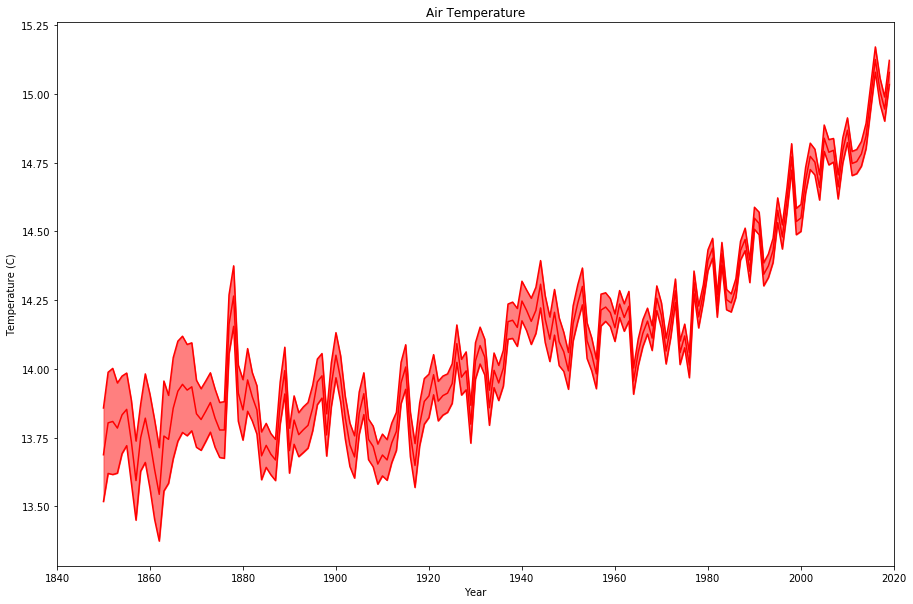

In [8]:
fig = plt.figure(figsize=(15,10))
plt.plot(temperature_df.index, temperature_df['Land Annual Unc.'] + temperature_df['Land Annual Temperature (C)'], color='red')
plt.plot(temperature_df.index, temperature_df['Land Annual Temperature (C)'] - temperature_df['Land Annual Unc.'], color='red')
plt.plot(temperature_df.index, temperature_df['Land Annual Temperature (C)'], color='red')
upper_bound = temperature_df['Land Annual Unc.'] + temperature_df['Land Annual Temperature (C)']
lower_bound = temperature_df['Land Annual Temperature (C)'] - temperature_df['Land Annual Unc.']
plt.fill_between(temperature_df.index, lower_bound, upper_bound, alpha=0.5, color='red')
plt.xlim(1840, 2020) 
plt.xlabel('Year')
plt.ylabel('Temperature (C)')
plt.title("Air Temperature")

Text(0.5, 1.0, 'Ocean Temperature')

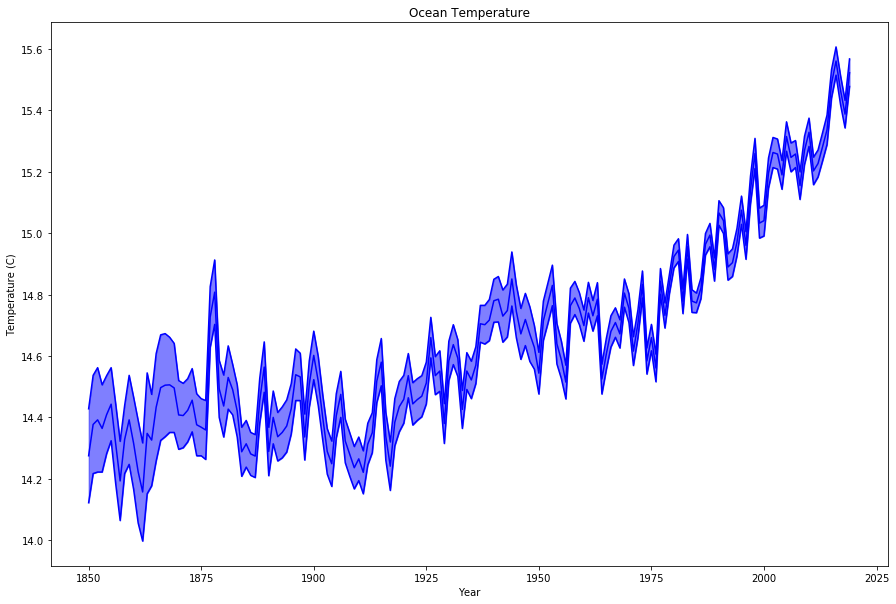

In [9]:
fig = plt.figure(figsize=(15,10))
plt.plot(temperature_df.index, temperature_df['Ocean Annual Unc.'] + temperature_df['Ocean Annual Temperature (C)'], color='blue')
plt.plot(temperature_df.index, temperature_df['Ocean Annual Temperature (C)'] - temperature_df['Ocean Annual Unc.'], color='blue')
plt.plot(temperature_df.index, temperature_df['Ocean Annual Temperature (C)'], color='blue')
upper_bound = temperature_df['Ocean Annual Unc.'] + temperature_df['Ocean Annual Temperature (C)']
lower_bound = temperature_df['Ocean Annual Temperature (C)'] - temperature_df['Ocean Annual Unc.']
plt.fill_between(temperature_df.index, lower_bound, upper_bound, alpha=0.5, color='blue')
plt.xlabel('Year')
plt.ylabel('Temperature (C)')
plt.title("Ocean Temperature")

The plots above indicate that both ocean and atmospheric temperatures are increasing steadily. A warmer atmosphere is more able to collect, retain, and release more water which could result in an increased frequency of extreme weather events including stroms, heat waves, floods, and droughs [11].

Species and habitats have also adapted to specific climates. With temperatures rising and weather patterns becoming more extreme, it is likely that some of these species / habitats will not be able to adapt to the new conditions quickly enough [12]. This could possibly result in habitat loss and species extinction [12]. 

Rising temperatures have also resulted in rising sea levels [13] and a loss of sea ice extent [14]. The consequences of these environmental changes will be discussed further when the pertinent data is analyzed later in this notebook.

### World Population Data
Although data about the world's population is not in and of itself an indication of climate change, it can be used to predict emission levels which will be done later in another analysis. The `population _data` DataFrame will be used for this purpose. Column descriptions for the DataFrame are as follows:
* Index: Index of row.
* Variant: Describes the method of population projection (in this instance they are estimates of dates that have already past)
* Region, subregion, country or area *: Geographic location.
* Notes: A code used to reference a note within a table in the .xls file that further clarifies interpretation or methodologies of other values for that row.
* Country code: A unique country code
* Type: Describes the type of geographic location.
* Parent code: The code of the parent geographic location.
* 1950 - 2020: Estimations of population for the indicated year.

As was done with previous DataFrames, the `info()` method will be used and the DataFrame will be displayed for data exploration puposes.

In [10]:
print(population_data.info())
population_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 78 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Index                                 289 non-null    int64 
 1   Variant                               289 non-null    object
 2   Region, subregion, country or area *  289 non-null    object
 3   Notes                                 82 non-null     object
 4   Country code                          289 non-null    int64 
 5   Type                                  289 non-null    object
 6   Parent code                           289 non-null    int64 
 7   1950                                  289 non-null    object
 8   1951                                  289 non-null    object
 9   1952                                  289 non-null    object
 10  1953                                  289 non-null    object
 11  1954                            

,Index,Variant,"Region, subregion, country or area *",Notes,Country code,Type,Parent code,1950,1951,1952,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,Estimates,WORLD,NaN,900,World,0,2 536 431,2 584 034,2 630 862,...,7 041 194,7 125 828,7 210 582,7 295 291,7 379 797,7 464 022,7 547 859,7 631 091,7 713 468,7 794 799
1,2,Estimates,UN development groups,a,1803,Label/Separator,900,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,3,Estimates,More developed regions,b,901,Development Group,1803,814 819,824 004,833 720,...,1 239 557,1 244 115,1 248 454,1 252 615,1 256 622,1 260 479,1 264 146,1 267 559,1 270 630,1 273 304
3,4,Estimates,Less developed regions,c,902,Development Group,1803,1 721 612,1 760 031,1 797 142,...,5 801 637,5 881 713,5 962 129,6 042 676,6 123 175,6 203 543,6 283 713,6 363 532,6 442 838,6 521 494
4,5,Estimates,Least developed countries,d,941,Development Group,902,195 428,199 180,203 015,...,856 471,876 867,897 793,919 223,941 131,963 520,986 385,1 009 691,1 033 389,1 057 438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,285,Estimates,Bermuda,14,60,Country/Area,918,37,38,38,...,65,65,64,64,64,63,63,63,63,62
285,286,Estimates,Canada,NaN,124,Country/Area,918,13 733,14 078,14 445,...,34 539,34 922,35 297,35 664,36 027,36 383,36 732,37 075,37 411,37 742
286,287,Estimates,Greenland,26,304,Country/Area,918,23,23,24,...,57,56,56,56,56,56,56,57,57,57
287,288,Estimates,Saint Pierre and Miquelon,2,666,Country/Area,918,5,5,5,...,6,6,6,6,6,6,6,6,6,6


In this case, only the columns that estimate the population for a given year in the row where "Region, subregion, country or area *" is labelled "WORLD" are of interest. The function `extract_world_pop()` found below extracts this information. 

In [11]:
def extract_world_pop(df, col_name):
    """
    Extracts "WORLD" population data from "world population dataset" DataFrame.
    
    Arguments:
    df -- A "temperature dataset" DataFrame.
    col_name -- String to be used as title of column in final DataFrame.
    
    Returns: 
    world_pop -- Final DataFrame with only "WORLD" population data.
    """
    # Select and transpose required data:
    non_year_cols = ['Index', 'Variant', 'Region, subregion, country or area *', 'Notes', 'Country code', 'Type', 'Parent code']
    world_pop = df[df['Region, subregion, country or area *'] == "WORLD"].T.drop(non_year_cols).reset_index()
    
    # Rename columns:
    world_pop.columns = ['Year', col_name]
    
    # Change columns to appropriate datatype:
    world_pop['Year'] = world_pop['Year'].astype('int')
    world_pop[col_name] = world_pop[col_name].str.replace(" ", "").astype('float') * 1000
    
    # Set 'Year' column as the index:
    world_pop.set_index('Year', inplace=True)
    
    return world_pop

In [12]:
world_pop = extract_world_pop(population_data, 'World Population')
world_pop

,World Population
Year,
1950,2.536431e+09
1951,2.584034e+09
1952,2.630862e+09
1953,2.677609e+09
1954,2.724847e+09
...,...
2016,7.464022e+09
2017,7.547859e+09
2018,7.631091e+09


In addition of current estimation of the population, further analysis will require projected population values as well. These can be found in the `population_pred_data` DataFrame. The structure of the DataFrame and description of columns are the same as that of `population _data`.

In [13]:
print(population_pred_data.info())
population_pred_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 88 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Index                                 289 non-null    int64 
 1   Variant                               289 non-null    object
 2   Region, subregion, country or area *  289 non-null    object
 3   Notes                                 82 non-null     object
 4   Country code                          289 non-null    int64 
 5   Type                                  289 non-null    object
 6   Parent code                           289 non-null    int64 
 7   2020                                  289 non-null    object
 8   2021                                  289 non-null    object
 9   2022                                  289 non-null    object
 10  2023                                  289 non-null    object
 11  2024                            

,Index,Variant,"Region, subregion, country or area *",Notes,Country code,Type,Parent code,2020,2021,2022,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,1,Medium variant,WORLD,NaN,900,World,0,7794798.729,7874965.732,7953952.577,...,10819682.64,10828780.96,10837182.08,10844878.8,10851860.15,10858111.59,10863614.78,10868347.64,10872284.13,10875393.72
1,2,Medium variant,UN development groups,a,1803,Label/Separator,900,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,3,Medium variant,More developed regions,b,901,Development Group,1803,1273304.261,1275554.769,1277414.018,...,1243328.289,1243352.535,1243407.636,1243489.674,1243594.776,1243718.306,1243855.546,1244001.259,1244149.969,1244295.62
3,4,Medium variant,Less developed regions,c,902,Development Group,1803,6521494.468,6599410.963,6676538.559,...,9576354.354,9585428.424,9593774.441,9601389.124,9608265.369,9614393.281,9619759.23,9624346.377,9628134.165,9631098.099
4,5,Medium variant,Least developed countries,d,941,Development Group,902,1057438.163,1081819.268,1106521.934,...,2895875.428,2914181.02,2932102.413,2949639.082,2966790.356,2983556.335,2999937.37,3015933.987,3031547.376,3046778.783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,285,Medium variant,Bermuda,14,60,Country/Area,918,62.273,62.092,61.942,...,39.449,39.15,38.86,38.568,38.281,38.002,37.724,37.457,37.188,36.933
285,286,Medium variant,Canada,NaN,124,Country/Area,918,37742.157,38067.913,38388.416,...,54767.374,54998.362,55232.423,55469.435,55709.296,55951.978,56197.541,56446.106,56697.908,56953.224
286,287,Medium variant,Greenland,26,304,Country/Area,918,56.772,56.868,56.975,...,42.975,42.703,42.433,42.158,41.887,41.614,41.338,41.071,40.79,40.524
287,288,Medium variant,Saint Pierre and Miquelon,2,666,Country/Area,918,5.795,5.771,5.757,...,4.16,4.138,4.124,4.1,4.082,4.063,4.041,4.016,4,3.984


Again, the desired data exists in the row where "Region, subregion, country or area *" is labelled "WORLD" under columns which predict the population on a given year. The `extract_world_pop()` function can be reused for extracting this data.

In [14]:
population_preds = extract_world_pop(population_pred_data, 'Predicted Population')
population_preds

,Predicted Population
Year,
2020,7.794799e+09
2021,7.874966e+09
2022,7.953953e+09
2023,8.031800e+09
2024,8.108605e+09
...,...
2096,1.085811e+10
2097,1.086361e+10
2098,1.086835e+10


### Emissions Data
The total amount of emissions for a given year will be a critical variable in the later analysis for predicting atmospheric CO2 concentrations. This data can be found in the `emissions_data` DataFrame. Descriptions of each column within that DataFrame are as follows:
* country_name: Name of country.
* 1970 - 2019: Estimation of emitted CO2 in Mtons.

As was done with previous DataFrames, the `info()` method will be used and the DataFrame will be displayed for data exploration puposes.

In [15]:
print(emissions_data.info())
emissions_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 51 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  210 non-null    object 
 1   1970          210 non-null    float64
 2   1971          210 non-null    float64
 3   1972          210 non-null    float64
 4   1973          210 non-null    float64
 5   1974          210 non-null    float64
 6   1975          210 non-null    float64
 7   1976          210 non-null    float64
 8   1977          210 non-null    float64
 9   1978          210 non-null    float64
 10  1979          210 non-null    float64
 11  1980          210 non-null    float64
 12  1981          210 non-null    float64
 13  1982          210 non-null    float64
 14  1983          210 non-null    float64
 15  1984          210 non-null    float64
 16  1985          210 non-null    float64
 17  1986          210 non-null    float64
 18  1987          210 non-null    

,country_name,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,1.48,1.48,1.53,1.49,1.91,1.71,1.63,1.89,1.64,...,5.64,6.92,9.70,16.34,10.37,9.85,9.48,9.99,10.40,11.00
1,Albania,4.72,4.72,5.37,4.79,5.16,5.24,5.60,5.99,6.82,...,4.60,5.00,4.55,4.79,5.32,4.98,4.82,5.47,5.45,5.66
2,Algeria,18.93,22.31,34.37,46.47,39.29,35.70,46.32,51.28,56.55,...,116.44,122.79,137.15,141.45,152.71,162.42,160.64,159.91,171.33,180.57
3,Angola,8.95,8.54,10.39,11.37,11.83,10.93,7.32,12.06,14.24,...,23.81,24.77,23.72,26.62,28.81,31.48,31.98,27.38,25.49,25.82
4,Anguilla,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.02,0.03,0.03,0.03,0.03,0.03,0.03,0.02,0.02,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,Yemen,1.50,1.51,1.79,2.21,2.20,2.10,2.56,2.60,2.86,...,26.10,22.20,21.08,27.80,26.33,13.94,10.77,10.52,10.55,10.89
206,Zambia,3.67,3.83,4.23,4.55,4.58,4.75,4.75,4.30,4.10,...,2.29,2.62,3.64,3.87,4.33,4.51,4.95,7.19,7.62,7.50
207,Zimbabwe,9.65,9.60,9.15,10.59,10.28,9.07,10.04,9.08,8.73,...,10.00,11.98,12.46,12.69,12.54,12.68,11.33,10.71,11.80,10.86
208,International Aviation,168.82,168.82,178.76,186.62,179.14,173.24,173.69,189.34,196.25,...,457.47,474.45,478.19,486.34,502.59,530.38,553.31,584.09,605.39,627.48


The variable of interest is the total emissions of the world for each year. To find these aggragated data points, the `np.sum()` function can be used. Once this is completed, additional data cleaning will be required so that manipulation of the data is more manageable. The code below accomplishes both of these tasks.

In [16]:
# Select data and calculate world emission levels for each year:
emissions_years = list(emissions_data.columns.drop(['country_name']))
total_CO2_emissions_per_year = np.sum(emissions_data[emissions_years], axis=0).reset_index()

# Rename columns:
total_CO2_emissions_per_year.columns = ['Year', 'Total CO2 Emissions per Year (Mt)']

# Covert columns to the appropriate datatype:
total_CO2_emissions_per_year['Year'] = total_CO2_emissions_per_year['Year'].astype('int')
total_CO2_emissions_per_year['Total CO2 Emissions per Year (Mt)'] = total_CO2_emissions_per_year['Total CO2 Emissions per Year (Mt)'].astype('float')

# Set the 'Year' column to index:
total_CO2_emissions_per_year = total_CO2_emissions_per_year.set_index(['Year'])

# Create new DataFrame with the same data:
emissions = total_CO2_emissions_per_year.copy()

The emissions conributed from each sector globally will also be required for the final analysis. This data can be found in the emissions_data_2 DataFrame. The columns are identical to that of emissions_data with the exception of the following additional column:
* Sector: Identifies the sector that the emissions came from.

As was done with previous DataFrames, the info() method will be used and the DataFrame will be displayed for data exploration puposes.

In [17]:
print(emissions_data_2.info())
emissions_data_2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sector        1036 non-null   object 
 1   country_name  1036 non-null   object 
 2   1970          1021 non-null   float64
 3   1971          1021 non-null   float64
 4   1972          1021 non-null   float64
 5   1973          1024 non-null   float64
 6   1974          1023 non-null   float64
 7   1975          1024 non-null   float64
 8   1976          1024 non-null   float64
 9   1977          1024 non-null   float64
 10  1978          1024 non-null   float64
 11  1979          1024 non-null   float64
 12  1980          1024 non-null   float64
 13  1981          1024 non-null   float64
 14  1982          1023 non-null   float64
 15  1983          1024 non-null   float64
 16  1984          1025 non-null   float64
 17  1985          1025 non-null   float64
 18  1986          1025 non-null 

,Sector,country_name,1970,1971,1972,1973,1974,1975,1976,1977,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Buildings,Afghanistan,0.58,0.58,0.46,0.57,0.77,0.59,0.48,0.43,...,0.65,0.75,0.75,0.92,0.85,0.86,0.80,0.84,0.867819,0.894897
1,Buildings,Albania,0.99,0.99,1.10,1.30,1.41,1.75,1.91,2.02,...,0.56,0.56,0.49,0.56,0.62,0.63,0.62,0.70,0.703210,0.716590
2,Buildings,Algeria,1.81,1.81,2.11,2.51,2.68,2.97,3.79,3.80,...,16.80,18.57,20.33,22.60,21.57,23.51,23.19,23.91,25.882578,27.089715
3,Buildings,Angola,0.12,0.12,0.14,0.14,0.13,0.12,0.09,0.10,...,3.77,4.15,4.61,5.69,5.61,5.06,5.03,4.14,4.191584,4.291666
4,Buildings,Anguilla,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000015,0.000014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,Transport,Yemen,0.66,0.66,0.92,1.25,1.25,1.02,1.53,1.47,...,7.15,6.66,5.48,8.31,8.11,3.08,2.58,2.37,2.334026,2.394467
1032,Transport,Zambia,0.63,0.63,0.69,0.73,0.69,0.74,0.77,0.68,...,0.66,0.74,0.91,0.98,1.12,1.15,1.10,1.54,1.589045,1.635470
1033,Transport,Zimbabwe,2.08,2.08,2.28,2.28,1.93,2.15,1.86,1.73,...,1.20,2.28,2.58,2.87,2.58,2.51,2.21,2.27,2.349143,2.410570
1034,Transport,International Aviation,168.82,168.82,178.76,186.62,179.14,173.24,173.69,189.34,...,457.47,474.45,478.19,486.34,502.59,530.38,553.31,584.09,605.394623,627.476230


The function below can be used in order to determine the yearly global emissions for a given sector.

In [18]:
def co2_con_sector(df, sector):
    """
    Inputs the sector emssions DataFrame and returns another DataFrame with yearly global emissions for a given sector.
    
    Arguments:
    df -- "Sector emissions" DataFrame.
    sector -- String to identify the sector of interest.
    
    Returns: 
    sector_emissions -- The returned DataFrame as mentioned in the description.
    """
    # Filter data for a specific sector:
    sector_df = df[df['Sector'] == sector]
    
    # Create list of yearly column names:
    years = list(sector_df.columns.drop(['Sector', 'country_name']))
    
    # Calculate emissions for a given year and specify column names:
    sector_emissions = np.sum(sector_df[years], axis=0).reset_index()
    sector_emissions.columns = ['Year', sector + ' Contribution to CO2 per Year (Mt)']
    
    # Convert columns to appropriate datatypes and set 'Year' column to index:
    sector_emissions['Year'] = sector_emissions['Year'].astype('int')
    sector_emissions[sector + ' Contribution to CO2 per Year (Mt)'] = sector_emissions[sector + ' Contribution to CO2 per Year (Mt)'].astype('float')
    sector_emissions = sector_emissions.set_index('Year')
    
    return sector_emissions

Now, using a for loop and the function above, the yearly global emissions for each sector can be determined. The resulting DataFrames are then concatenated together with the `emissions` DataFrame to simplify access to the data for future use.

In [19]:
sectors = emissions_data_2['Sector'].unique()

for sector in sectors:
    sector_emissions = co2_con_sector(emissions_data_2, sector)
    emissions = pd.concat([emissions, sector_emissions], axis=1)

Sector emission data can now be represented graphically. The following graphical representation was inspired by https://www.worldometers.info/co2-emissions/ [15].

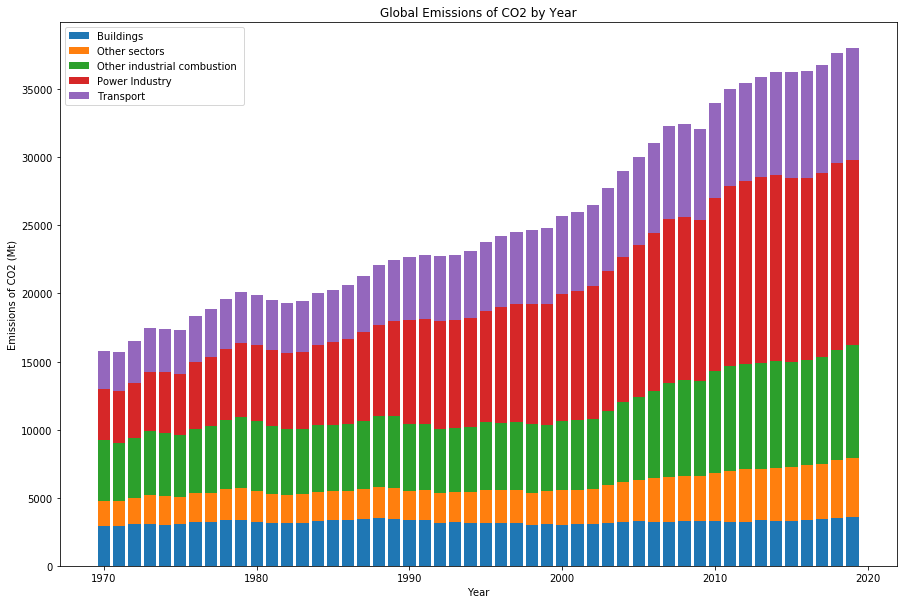

In [20]:
CO2_sectors = emissions.columns.drop('Total CO2 Emissions per Year (Mt)')
base = 0
fig = plt.figure(figsize=(15,10))
pop_emissions = world_pop.copy()

for sector in CO2_sectors:
    p_ = plt.bar(x=emissions.index, height=emissions[sector], bottom=base, label=sector.replace('Contribution to CO2 per Year (Mt)', ''))
    base += emissions[sector]
    pop_emissions = pd.concat([pop_emissions, emissions[sector]], axis=1)

pop_emissions = pop_emissions.dropna()  
    
plt.ylabel('Emissions of CO2 (Mt)')
plt.xlabel('Year')
plt.title('Global Emissions of CO2 by Year')
plt.legend()

It is clear from the plot above that, with the exception of the buildings section, emissions are on the rise each year for every sector. 

### Atmospheric CO2 Concentration Data
Atmospheric CO2 Concentration is the most important variable in this analysis as it is what results in the earth's rise in temperature. The effects of the earth's temperature rising are vast and described throughout this notebook. 

Atmospheric CO2 concentration data can be found in the `co2_concentration` DataFrame. A description of the columns within this DataFrame are as follows:
* Year: The year associated with each data point.
* Concentration: Measured atmospheric CO2 concentration for a given year in parts per million (ppm).
* Uncertainty: The uncertainty associated with the CO2 concentration measurement in ppm.

As was done with previous DataFrames, the `info()` method will be used and the DataFrame will be displayed for data exploration puposes.

In [21]:
print(co2_concentration_data.info())
co2_concentration_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year                 118 non-null    object
 1   Concentration (ppm)  72 non-null     object
 2   Uncertainty (ppm)    65 non-null     object
dtypes: object(3)
memory usage: 1.4+ KB
None


,Year,Concentration (ppm),Uncertainty (ppm)
0,# --------------------------------------------...,NaN,NaN
1,# USE OF NOAA ESRL DATA,NaN,NaN
2,#,NaN,NaN
3,# These data are made freely available to the ...,NaN,NaN
4,# scientific community in the belief that thei...,NaN,NaN
...,...,...,...
113,2016,404.22,0.12
114,2017,406.55,0.12
115,2018,408.52,0.12
116,2019,411.43,0.12


Note: The column names of the DataFrame was specified at import to make data cleaning more manageable. This is due to the inclusion of rows with text which are discussed further below.

As is clear from the output of the DataFrame, there are a number of rows of text included which acted as a description for the original file. These rows are of no value in terms of data analysis and should therefore be removed.

An unfortunate side-effect of these rows of text being included is that the columns of the DataFrame that should be of a numerical dtype are now `object` dtypes. Once the text rows are removed, the columns should be converted to the appropriate datatypes.

The code below can be used to accomplish the data cleaning tasks described above.

In [22]:
# Find index of header from original file:
header_index = None
for index, value in enumerate(co2_concentration_data.iloc[:,0]):
    if value == 'year':
        header_index = index

# Remove rows of text:
cleaned_co2_concentration = co2_concentration_data.iloc[header_index+1:,:].reset_index().drop(['index'], axis=1)

# Convert columns into appropriate datatypes:
cleaned_co2_concentration['Year'] = cleaned_co2_concentration['Year'].astype('int')
cleaned_co2_concentration['Concentration (ppm)'] = cleaned_co2_concentration['Concentration (ppm)'].astype('float')
cleaned_co2_concentration['Uncertainty (ppm)'] = cleaned_co2_concentration['Uncertainty (ppm)'].astype('float')

In order to determine whether CO2 levels can be decreased in the future, the YOY difference in atmospheric CO2 concentration will need to be calculated. The code below accomplishes this.

In [23]:
# Create "dummy" column that is one concentration value shifted to the next row:
dummy_concentration_col = [cleaned_co2_concentration.loc[0,"Concentration (ppm)"]] + list(cleaned_co2_concentration["Concentration (ppm)"])
_ = dummy_concentration_col.pop(-1)
dummy_concentration_col = pd.Series(dummy_concentration_col)

# Calculate year-over-year concentration difference and rename DataFrame:
cleaned_co2_concentration["YOY Concentration Difference (ppm)"] = cleaned_co2_concentration["Concentration (ppm)"] - dummy_concentration_col
co2_concentration = cleaned_co2_concentration.set_index('Year')

CO2 emissions can also be expressed as a parts per million molar ratio in the Earth's atmosphere. Having the data in this format will be useful for when CO2 concentrations need to be compared and predicted. The function below takes a mass amount of CO2 and converts it to the equivilant atmospheric CO2 concentration.

In [24]:
def added_ppm_molar(co2_Mtons):
    """
    Inputs a value of CO2 mass which is converted and returned as the equivilent amount of CO2 expressed in ppm in the earth's atmoshpere..
    
    Arguments:
    co2_Mtons -- The amount of CO2 expressed in Mtons.
    
    Returns: 
    co2_ppm -- The amount of CO2 expressed in ppm in the earth's atmosphere.
    """
    # If input to function is a NaN value, return NaN:
    if co2_Mtons == np.NaN:
        return np.NaN
    
    # Calculate the number of moles in the entire atmoshpere:
    m_atm_kg = 5.1480 * 10**18 # [16]
    m_atm_ton = m_atm_kg / 1000
    M_atm_g_per_mol = 28.946 # [17]
    M_atm_ton_per_mol = M_atm_g_per_mol / 1000000
    n_atm = m_atm_ton / M_atm_ton_per_mol
    
    # Calculate moles of CO2 from human emissions:
    M_CO2_g_per_mol = 44.0095
    M_CO2_ton_per_mol = M_CO2_g_per_mol / 1000000
    n_CO2 = 1000000*co2_Mtons / M_CO2_ton_per_mol
    
    # Calculate added CO2 in ppm:
    co2_ppm = 1000000 * n_CO2 / n_atm
    
    return co2_ppm

The function above can now be used to create an additional column in the `co2_concentration` which shows how much CO2 was added to the atmosphere through human related emissions expressed in ppm.

In [25]:
temp_df = pd.concat([co2_concentration['YOY Concentration Difference (ppm)'], total_CO2_emissions_per_year['Total CO2 Emissions per Year (Mt)']], axis=1)
co2_concentration['Human Added CO2 molar (ppm)'] = temp_df['Total CO2 Emissions per Year (Mt)'].apply(added_ppm_molar)
co2_concentration.tail(10)

,Concentration (ppm),Uncertainty (ppm),YOY Concentration Difference (ppm),Human Added CO2 molar (ppm)
Year,,,,
2011,391.65,0.12,1.75,4.476133
2012,393.86,0.12,2.21,4.533971
2013,396.52,0.12,2.66,4.587424
2014,398.64,0.12,2.12,4.630690
2015,400.83,0.12,2.19,4.631076
2016,404.22,0.12,3.39,4.637742
2017,406.55,0.12,2.33,4.700985
2018,408.52,0.12,1.97,4.812574
2019,411.43,0.12,2.91,4.857081


In [26]:
co2_concentration['Ratio of Human Contributed CO2 to Added CO2 in Atmosphere'] = co2_concentration['Human Added CO2 molar (ppm)'] / co2_concentration['YOY Concentration Difference (ppm)']
co2_concentration['CO2 Human Absorbed from Atmosphere (ppm)'] = co2_concentration['Human Added CO2 molar (ppm)'] - co2_concentration['YOY Concentration Difference (ppm)']

### Sea Level Data
A good indicator of a changing climate is the sea level - sea levels should be expected to rise if temperatures are increasing and vice versa for decreasing temperatures. Sea level data can be found in the `sea_level_data` DataFrame. A description of each of the columns is as follows:
* Year: The year of the associated data.
* CSIRO - Adjusted sea level (inches): Sea level measured by CSIRO using tide gauges.
* CSIRO - Lower error bound (inches): Lower error bound of the CSIRO - Adjusted sea level in inches.
* CSIRO - Upper error bound (inches): Upper error bound of the CSIRO - Adjusted sea level in inches.
* NOAA - Adjusted sea level (inches): sea level measured by NOAA using satillite instrumentation.

As was done with previous DataFrames, the `info()` method will be used and the DataFrame will be displayed for data exploration puposes.

In [27]:
print(sea_level_data.info())
sea_level_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 5 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Figure 1. Global Average Absolute Sea Level Change, 1880-2015  141 non-null    object
 1   Unnamed: 1                                                     135 non-null    object
 2   Unnamed: 2                                                     135 non-null    object
 3   Unnamed: 3                                                     135 non-null    object
 4   Unnamed: 4                                                     24 non-null     object
dtypes: object(5)
memory usage: 2.8+ KB
None


,"Figure 1. Global Average Absolute Sea Level Change, 1880-2015",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Source: EPA's Climate Change Indicators in the...,NaN,NaN,NaN,NaN
1,"Data source: CSIRO, 2015; NOAA, 2016",NaN,NaN,NaN,NaN
2,Web update: August 2016,NaN,NaN,NaN,NaN
3,Units: inches,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,Year,CSIRO - Adjusted sea level (inches),CSIRO - Lower error bound (inches),CSIRO - Upper error bound (inches),NOAA - Adjusted sea level (inches)
6,1880,0,-0.952755905,0.952755905,NaN
7,1881,0.220472441,-0.732283464,1.173228345,NaN
8,1882,-0.440944881,-1.346456692,0.464566929,NaN
9,1883,-0.232283464,-1.129921259,0.66535433,NaN


As is clear from the output of the DataFrame, there are a number of rows of text included which acted as a description for the original file. These rows are of no value in terms of data analysis and should therefore be removed.

An unfortunate side-effect of these rows of text being included is that the columns of the DataFrame that should be of a numerical dtype are now `object` dtypes. Once the text rows are removed, the columns should be converted to the appropriate datatypes.

The code below can be used to accomplish the data cleaning tasks described above.

In [28]:
# Remove text rows:
sea_level = sea_level_data.iloc[5:,:]

# Make "header row" into DataFrame header:
sea_level.columns = list(sea_level.iloc[0])

# Drop "header row" and convert columns to the appropriate datatypes:
sea_level = sea_level.drop(5).astype('float')
sea_level['Year'] = sea_level['Year'].astype('int')

# Make 'Year' column into index:
sea_level = sea_level.set_index('Year')

sea_level

,CSIRO - Adjusted sea level (inches),CSIRO - Lower error bound (inches),CSIRO - Upper error bound (inches),NOAA - Adjusted sea level (inches)
Year,,,,
1880,0.000000,-0.952756,0.952756,NaN
1881,0.220472,-0.732283,1.173228,NaN
1882,-0.440945,-1.346457,0.464567,NaN
1883,-0.232283,-1.129921,0.665354,NaN
1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...
2011,8.964567,8.661417,9.267717,7.976878
2012,9.326772,8.992126,9.661417,8.397377
2013,8.980315,8.622047,9.338583,8.484542


The output from the previous code cell indicates that a given year may not have all data points available. In order to make the most use out of the data, the CSIRO data and the NOAA data need to be combined. The methodology for combining the data will be as follows:
* If only one of the data points is available, use that value alone.
* If both data points are available, take the average of the two and use that value.

The function below can be used to combine the data as specified.

In [29]:
def sea_level_combine(row):
    """
    Takes a row from the "sea_level" DataFrame and combines the sea level data as follows:
     - If only one of the data points is available, use that value alone.
     -If both data points are available, take the average of the two and use that value.
    
    Arguments:
    row -- a row from the "sea_level" DataFrame.
    
    Returns: 
    level -- float value of sea level (inches).
    """
    # Determine data availability and combine data appropriately:
    if (np.isnan(row)[0]) and (np.isnan(row)[1]):
        level = np.NaN
    elif (np.isnan(row)[1]):
        level = row[0]
    elif (np.isnan(row)[0]):
        level = row[1]
    else:
        level = (row[0] + row[1]) / 2
        
    return level

The created function may now be used to create a Pandas Series which has the combined sea level data from `sea_level`.

In [30]:
sea_level_sub = sea_level[['CSIRO - Adjusted sea level (inches)', 'NOAA - Adjusted sea level (inches)']]
combined_sea_levels = sea_level_sub.apply(sea_level_combine, axis=1)
print(combined_sea_levels.head(10))
combined_sea_levels.tail(10)

Year
1880    0.000000
1881    0.220472
1882   -0.440945
1883   -0.232283
1884    0.590551
1885    0.531496
1886    0.437008
1887    0.216535
1888    0.299213
1889    0.362205
dtype: float64


Year
2006    7.784667
2007    7.827327
2008    8.106583
2009    8.289849
2010    8.483716
2011    8.470723
2012    8.862074
2013    8.732429
2014    8.598324
2015    8.943308
dtype: float64

Now that the sea level data has been cleaned and processed, visualizations of the data can be made to determine if there are any clear trends.

Text(0.5, 1.0, 'Sea Level')

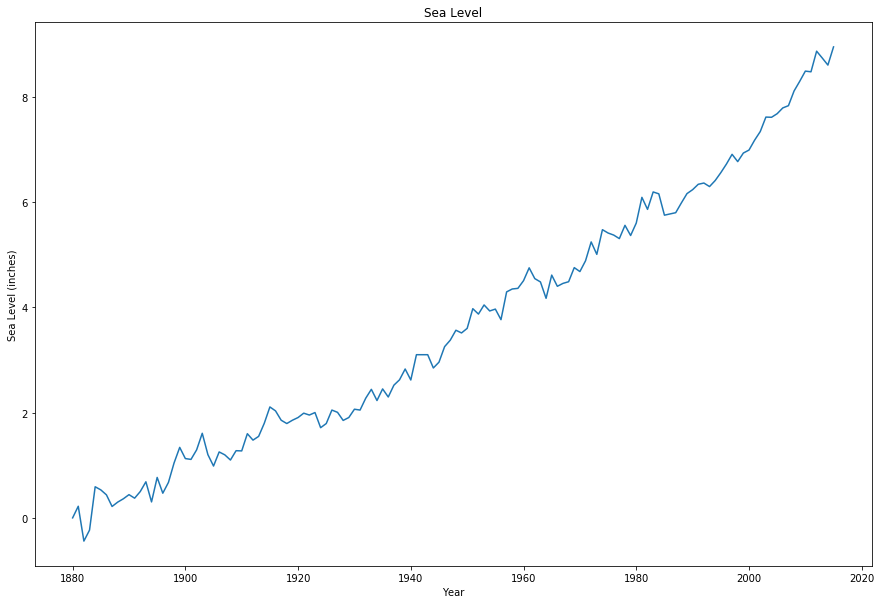

In [31]:
fig = plt.figure(figsize=(15,10))
plt.plot(combined_sea_levels.index, combined_sea_levels, label='Sea Level')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Sea Level')

The plot above clearly illustrates that sea levels have been increasing consistently over time. As was previously mentioned, this is the result of the Earth's temperature rising as well as the loss of sea ice (discussed in a later section of this notebook). Rising sea levels can lead to many serious consequences including:
* Devastating effects on coastal habitats farther inland [18]
* Destructive erosion [18]
* Wetland flooding [18]
* Aquifer and agricultural soil contamination with salt [18]
* Lost habitat for fish, birds, and plants [18]
* Submergence and flooding of coastal land [19]
* Saltwater intrusion into surface waters and groundwater [19]
* Overwhelmingly negative social and economic repercussions [19]

### Sea Ice Data
Another key indicator of climate change is sea ice extent - If the Earth's temperature is rising, it is expected that there should be less sea ice extent each year. Sea ice extent data can be found across a number of files which share the following general file path structure:

`'climate data/SeaIceData/North Monthly/N_01_extent_v3.0.csv'`
* `North Monthly` - is either `North Monthly` or `South Monthly` depending on which pole the sea ice is measured in.
* `N_` - is either `N_` or `S_` depending on which pole the sea ice is measured in.
* `01_` - Numbered `01_` through `12_` to denote the month of the year.

The columns within these DataFrames are common and are described as follows:
* year: The year of the associated data.
* mo: The month of the associated data.
* data-type: Input data set Goddard:  Sea Ice Concentrations from Nimbus-7 SMMR and DMSP SSM/I-SSMIS Passive Microwave Data NRTSI-G:  Near-Real-Time DMSP SSMIS Daily Polar Gridded Sea Ice Concentrations
* region: Hemisphere that this data covers N: Northern S: Southern
* extent: Sea ice extent in millions of square km
* area: Sea ice area in millions of square km

The function below gathers the pertinent data from the specified pole and combines the data into two DataFrames; one for sea ice area and another for sea ice extent. 

In [32]:
def clean_sea_ice(pole='north'):
    """
    Pulls data from a number of .csv files to create a two master DataFrames containing the sea ice extent and area data, respectively, over the available timeframe. Hemisphere of data is based on the 'pole' arguemnt. 
    
    Arguments:
    pole -- Specifies the hemisphere of interest.
    
    Returns: 
    df_ext -- DataFrame containing the sea ice extent for a given hemisphere. Rows of a cell represents the year, and the column of a cell represents the month.
    df_area -- DataFrame containing the sea ice area for a given hemisphere. Rows of a cell represents the year, and the column of a cell represents the month.
    """
    # Create empty DataFrame:
    df_ext = pd.DataFrame()
    
    # Create 'Year' column from year data in file:
    if pole == 'north':
        df_ext["Year"] = pd.read_csv('climate data/SeaIceData/North Monthly/N_01_extent_v3.0.csv')['year'].astype('int')
    elif pole == 'south':
        df_ext["Year"] = pd.read_csv('climate data/SeaIceData/South Monthly/S_01_extent_v3.0.csv')['year'].astype('int')
    
    # Set year column to index:
    df_ext.set_index("Year", inplace=True)
    
    # Create duplicate DataFrame to be used as base for sea ice area data:
    df_area = df_ext.copy()
    
    # Create list of months:
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    
    # Loop over the number of months:
    for i in range(1,13):
        # Create appropriate string (based on for loop) to feed to the pd.read_csv() function:
        if pole == 'north':
            if i >= 10:
                ice_string = 'climate data/SeaIceData/North Monthly/N_{}_extent_v3.0.csv'.format(i)
            else:
                ice_string = 'climate data/SeaIceData/North Monthly/N_0{}_extent_v3.0.csv'.format(i)
        elif pole == 'south':
            if i >= 10:
                ice_string = 'climate data/SeaIceData/South Monthly/S_{}_extent_v3.0.csv'.format(i)
            else:
                ice_string = 'climate data/SeaIceData/South Monthly/S_0{}_extent_v3.0.csv'.format(i)
        
        # Read in data:
        ice = pd.read_csv(ice_string) # [20]

        # Strip whitespace from columns titles:
        ice_cols = []
        for col in ice.columns:
            ice_cols.append(col.strip())
        ice.columns = ice_cols

        # Remove impertinent data and set index of temporary 'ice' DataFrame to 'Year':
        ice = ice.drop(['mo', 'data-type', 'region'], axis=1).astype(float)
        ice['Year'] = ice['year'].astype(int)
        ice.set_index('Year', inplace=True)

        # Create a column for the data of that month in the master DataFrames:
        df_ext[months[i-1] + ' Extent (million km2)'] = ice['extent']
        df_area[months[i-1] + ' Area (million km2)'] = ice['area']
        
        # Replace outliers with interpolated data points:
        for df in [df_ext, df_area]:
            df = remove_outliers_ice(df)
        
    return df_ext, df_area

During the original data cleaning process of this data, it was found that there were some outliers in the data that were consistently of the value -9999. To remove these outliers the below function was used. The function identifies data that has a value of -9999 and replaces it with interpolated data from the previous and later years of the corresponding column. The `remove_outliers_ice()` function is called in the `clean_sea_ice()` function.

In [33]:
def remove_outliers_ice(df):
    """
    Goes through DataFrame to find any outliers within the data and replaces the outlier data with interpolated data from the previous and later years of the corresponding column.
    
    Arguments:
    df -- DataFrame of sea ice extent or area.
    
    Returns: 
    df -- The same DataFrame with any potential outliers (i.e. values of -9999) replaced with interpolated data from the previous and later years of the corresponding column.
    """
    for col in df.columns:
        outlier_col = df.loc[df[col] == -9999, col]
        for i in outlier_col.index:
            df.loc[i,col] = (df.loc[i-1,col] + df.loc[i+1,col]) / 2
            
    return df

The `clean_sea_ice()` function is not used to create sea ice extent and area DataFrames for both Nothern and Southern hemispheres.

In [34]:
north_ice_ext, north_ice_area = clean_sea_ice(pole='north')
south_ice_ext, south_ice_area = clean_sea_ice(pole='south')

The consulodated data can now be used to create plots for sea ice levels for each month year-over-year. The `plot_seaice_month()` function below creates a multiplot display input sea ice DataFrame.

In [35]:
def plot_seaice_month(df, hemi="North", measure="Extent"):
    """
    Creates plots of sea ice levels from DataFrame.
    
    Arguments:
    df -- DataFrame of sea ice extent or area.
    hemi -- String identifying hemisphere of interest for labelling purposes
    
    """
    fig, axs = plt.subplots(4, 3, figsize=(15,15))
    fig.suptitle(hemi + ' Ice ' + measure, fontdict={'fontsize': 16}, y=1.01)
    fig.tight_layout(pad=4.0)
    for i in range(4):
        for j in range(3):
            axs[i, j].plot(df.index, df[df.columns[i*3 + j]])
            axs[i, j].set_title(df.columns[i*3 + j].split(' ', 1)[0])
    for ax in axs.flat:
        ax.set(xlabel='Year', ylabel='Ice ' + measure + ' (millions km2)')

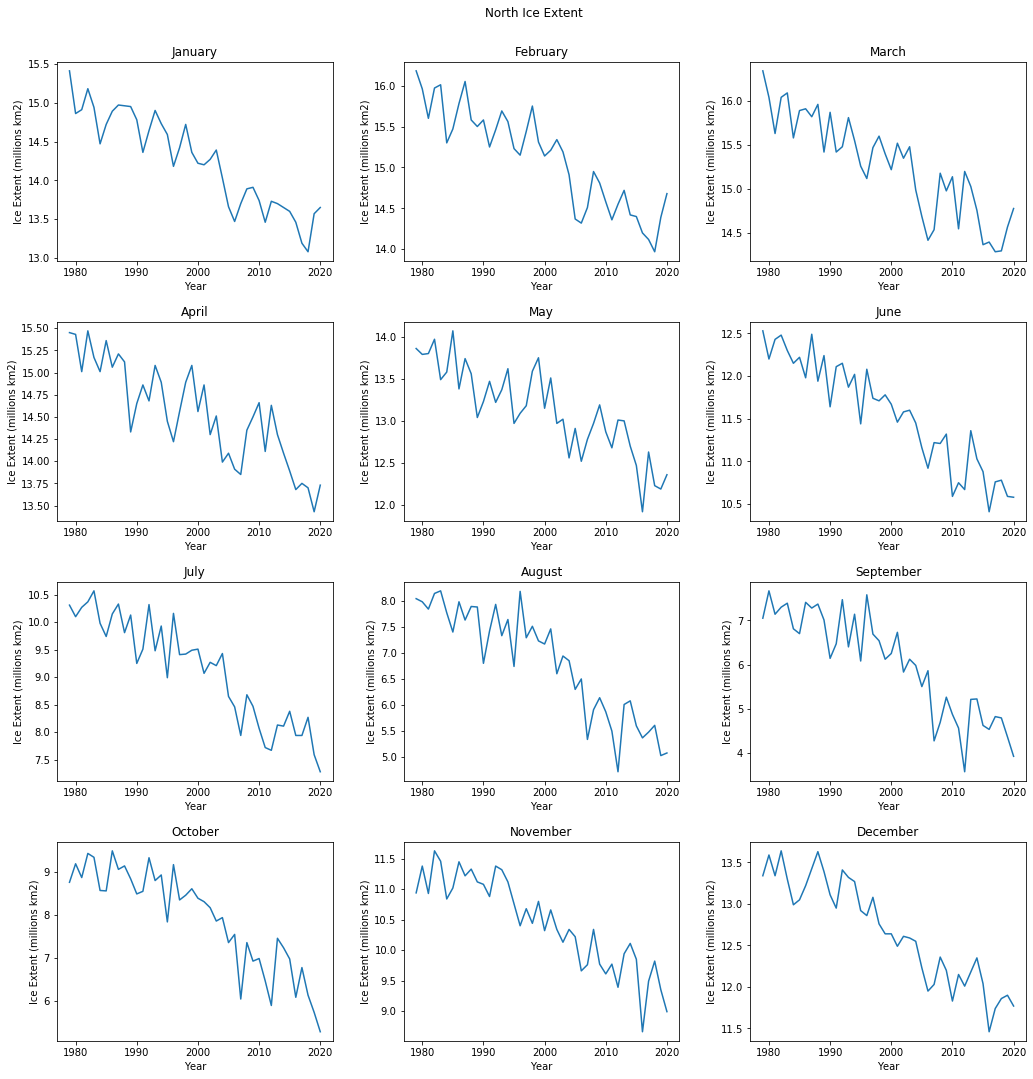

In [36]:
plot_seaice_month(north_ice_ext, hemi="North", measure="Extent")

What are the trends?: Based on the plots above, it is evident that sea ice extent in the northern hemisphere is decreasing year-over-year at all points of the year (i.e. month).

Why is this happening?: The decreased sea ice extent is the result of increased global temperatures which are due to the increased concentration of CO2 in the Earth's atmosphere caused by human related activity. [14]

What are the consequences?: There are two primary consequences associated with the decrease in ice extent; 1. less ice will cause sea levels to rise. The resulting consequences of this effect are discussed in the Sea Level Data Section. 2. With less sea ice extent available, more solar radiation will be absorbed, which could further exacerbate the rise in global temperatures. [21]

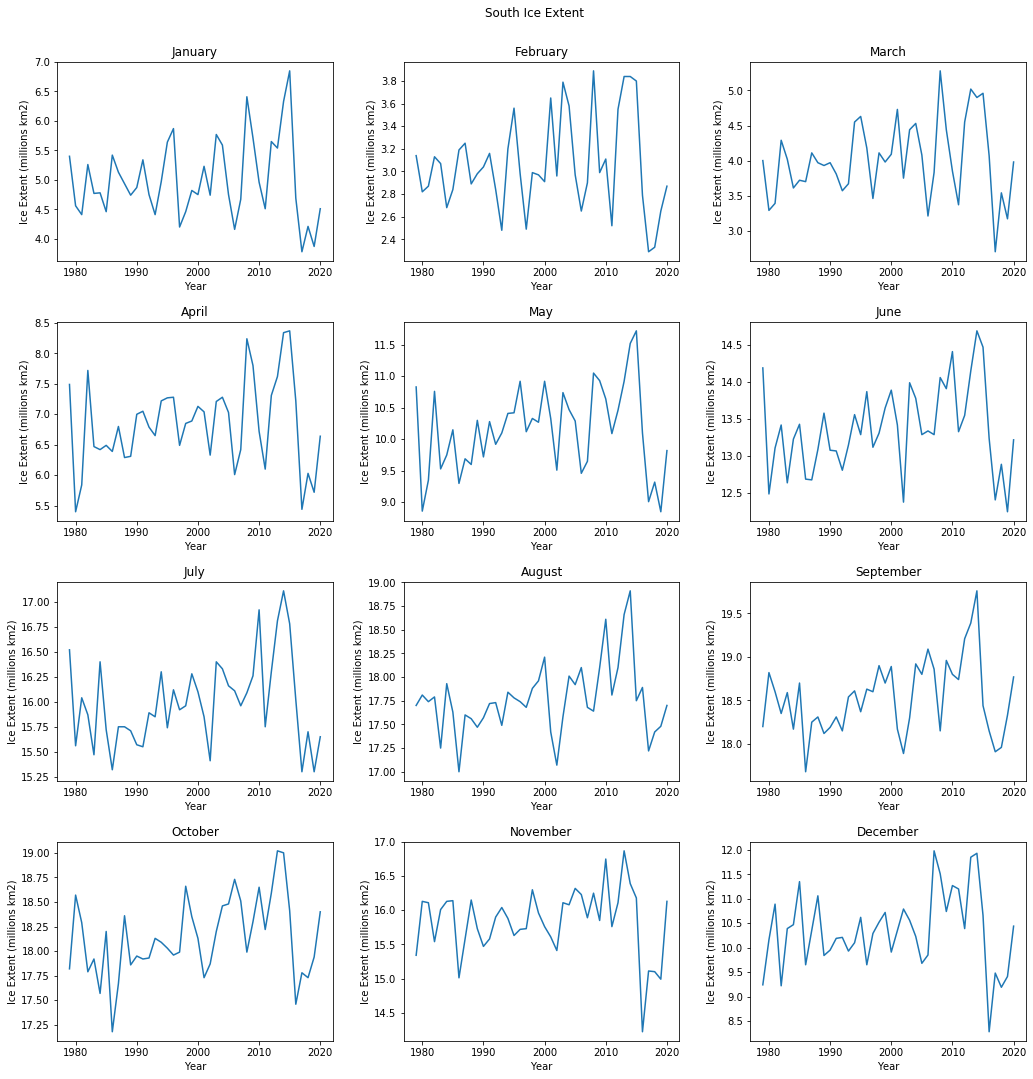

In [37]:
plot_seaice_month(south_ice_ext, hemi="South", measure="Extent")

What are the trends?: From the plots above, there is no clear indication that sea ice extent is increasing or decreasing in the Southern Hemisphere. It should be noted that there is still some fluctuation in the sea ice extent over time.

Why is this?: Given the other data points presented in this notebook, the expectation would be that southern hemisphere ice extent should be decreasing over time, like it is in the northern hemisphere. The assumed reason for this is the geographic differences of the Artic and Antartic [22].

What are the consequences?: It is difficult to determine whether there are any consequences based on the fact that the data is relatively stable.

## Human Contribution

Something that is seldom discussed on the topic of climate change is how much of the increase in atmospheric CO2 concentraions is attributable to human activity. This is not to say that the increased CO2 concentration in the atmosphere is never attributed to human activity, but rather a precise number is never mentioned. 

To investigate this further, the recently calculated `co2_concentration['Ratio of Human Contributed CO2 to Added CO2 in Atmosphere']` column may be used. The values within the column can be compared to a value of 1 which indicates humans are 100% responsible.

The code below is used to create a plot for visualizing this comparison.

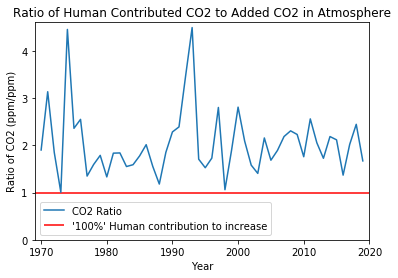

In [38]:
# Drop NaN values:
frac_human_co2_ppm = co2_concentration['Ratio of Human Contributed CO2 to Added CO2 in Atmosphere'].dropna()

# Plot column:
plt.plot(frac_human_co2_ppm.index, frac_human_co2_ppm, label='CO2 Ratio')
plt.ylim([0,4.6])
plt.xlim([1969,2020])
plt.xlabel('Year')
plt.ylabel('Ratio of CO2 (ppm/ppm)')
plt.title('Ratio of Human Contributed CO2 to Added CO2 in Atmosphere')
plt.hlines(1, 1969, 2020, colors='red', label="'100%' Human contribution to increase")
plt.legend()

The plot above illustrates that humans are not only wholey responsible for the increased CO2 concentrations in the atmosphere, but also emit more CO2 than is indicated by the increase in CO2 levels. This is the result of a number of "Carbon Sinks" absorbing a large amount of that CO2. The two primary "carbon sinks" are [23]:
* Vegetation: Vegetation grows through a process called photosynthesis which requires CO2 [24]. 
* The Ocean: The ocean is capable of absorbing CO2 through two mechanisms: diffusion from the atmosphere and through the process of photosynthesis of plankton and algea [25].

Given that the Earth is capable of absorbing CO2 each year, is it possible to bring down the atmospheric concentration of CO2 to stable levels (350 ppm [26]) with the implementation of sustainable technologies and policy? Although a completely certain answer may not be possible, a small analysis can provide some intuition as to what is possible.

The following equation can be used to relate changes in atmospheric CO2 concentrations to global emissions and CO2 absorbtion:

$$ C_{i} - C_{i-1} = E_{i} - A_{i} \tag{1}$$

$$ => C_{i} = E_{i} - A_{i} + C_{i-1} \tag{2}$$

Where,

$ C_{i} $ - The predicted atmospheric CO2 concentration for the ith year (ppm).

$ C_{i-1}  $ - The atmospheric CO2 concentration of the i-1th year (ppm).

$ E_{i}  $ - The predicted CO2 emissions of the ith year, expressed in an atmospheric CO2 concentration (ppm).

$ A_{i}  $ - The amount of CO2 absorbed from the atmosphere of the ith year, expressed in an atmospheric CO2 concentration (ppm).

To make predictions of future absorbtion of CO2 in the atmosphere, a linear regression model can be fit with the data presented thus far in this notebook. This feature data will include:
* Air Temperature Data
* Ocean Temperature Data
* Sea Level Data
* Population Data
* North Sea Ice Extent Data for the month of February
* South Sea Ice Extent Data for the month of September

Note: Sea ice extent data was chosen based on when the most ice was present during the year.

First, a DataFrame containing the pertinent data is to be created. The code below accomplishes this.

In [39]:
# Create initial DataFrame:
CO2_abosorbtion_df = pd.concat([temperature_df['Land Annual Temperature (C)'], temperature_df['Ocean Annual Temperature (C)']], axis=1)

# Create list of other data to be concatenated to DataFrame:
CO2_abosorbtion_data = [combined_sea_levels, world_pop, north_ice_ext['February Extent (million km2)'], south_ice_ext['September Extent (million km2)'], co2_concentration['Concentration (ppm)'], co2_concentration['CO2 Human Absorbed from Atmosphere (ppm)']]

# Concatenate data from list to DataFrame:
for data in CO2_abosorbtion_data:
    CO2_abosorbtion_df = pd.concat([CO2_abosorbtion_df, data], axis=1)
    
# Drop any NaN values (machine learning cannot handle)
CO2_abosorbtion_df = CO2_abosorbtion_df.dropna()

# Rename sea ice data column title:
CO2_abosorbtion_df.rename({0: "Sea Level (inches)"}, axis=1, inplace=True)

Now the data is in a format which can be easily fed into a machine learning model using the `sklearn` framework. The code below fits the data into the linear regression model and evaluates the model's performance.

In [40]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# Create list of features from DataFrame columns:
features = list(CO2_abosorbtion_df.columns.drop('CO2 Human Absorbed from Atmosphere (ppm)'))

# Instantiate linear regression model:
lr = LinearRegression()

# Fit data to model:
lr.fit(CO2_abosorbtion_df[features], CO2_abosorbtion_df['CO2 Human Absorbed from Atmosphere (ppm)'])

# Make predictions based on training data:
co2_absorbtion_predictions = lr.predict(CO2_abosorbtion_df[features])
co2_absorbtion_predictions_df = pd.DataFrame(co2_absorbtion_predictions)
co2_absorbtion_predictions_df.set_index(CO2_abosorbtion_df.index, inplace=True)

# Evaluate model performance:
lr_rmse = np.sqrt(mean_squared_error(CO2_abosorbtion_df['CO2 Human Absorbed from Atmosphere (ppm)'], co2_absorbtion_predictions))
print("Root Mean Squared Error of Linear Regression Model: " +  str(round(lr_rmse, 3)))

Root Mean Squared Error of Linear Regression Model: 0.351


Year
1998    0.177810
1988    0.428759
1980    0.631242
Name: CO2 Human Absorbed from Atmosphere (ppm), dtype: float64


Text(0, 0.5, 'Frequency of Occurence')

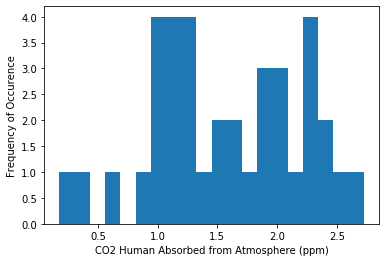

In [41]:
print(CO2_abosorbtion_df['CO2 Human Absorbed from Atmosphere (ppm)'].sort_values().head(3))
plt.hist(CO2_abosorbtion_df['CO2 Human Absorbed from Atmosphere (ppm)'], bins=20)
plt.xlabel('CO2 Human Absorbed from Atmosphere (ppm)')
plt.ylabel('Frequency of Occurence')

Given that the three lowest actual CO2 absorbtion values are 0.180, 0.431, and 0.633 respectively, an RMSE of 0.351 might seem high. Although these data points aren't necessarily outliers, it is evident that they are somewhat anomalous when compared to the distribution of values. If these lower absorbtion values are treated as anamalous, the RMSE value of the prediction model seems reasonable, especially given the amount of data used to train the model.

In order to make future predictions of absorbtion of atmospheric CO2, the features of the linear regression model will also need future predictions. Data of population predicts have already been imported to this notebook.

To simplify predicting the remaining features of the linear regression model, the features will be represented as a function of the atmospheric CO2 concentration. The code cells below creates these linear functions and plots them against the actual data of the feature.

In [42]:
def linear_func(x, m, b):
    return m * x + b

def linear_reg_func(a_1, a_2, a_3, a_4, a_5, a_6, a_7, x_1, x_2, x_3, x_4, x_5, x_6, x_7, b):
    return a_1*x_1 + a_2*x_2 + a_3*x_3 + a_4*x_4 + a_5*x_5 + a_6*x_6 + a_7*x_7 + b

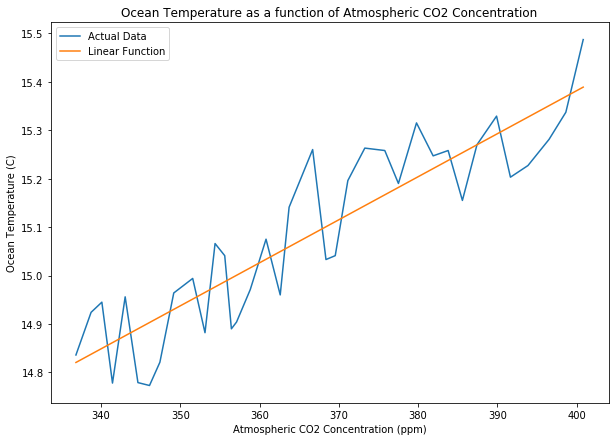

In [43]:
# Graph Ocean Temperature against CO2 Concentration:
init_vals = [15, 6]
popt_ocean_temp, pcov_ocean_temp = curve_fit(linear_func, CO2_abosorbtion_df['Concentration (ppm)'], CO2_abosorbtion_df['Ocean Annual Temperature (C)'], p0=init_vals)

fig = plt.figure(figsize=(10,7))
plt.plot(CO2_abosorbtion_df['Concentration (ppm)'], CO2_abosorbtion_df['Ocean Annual Temperature (C)'], label='Actual Data')
plt.plot(CO2_abosorbtion_df['Concentration (ppm)'], linear_func(CO2_abosorbtion_df['Concentration (ppm)'], *popt_ocean_temp), label='Linear Function')
plt.xlabel('Atmospheric CO2 Concentration (ppm)')
plt.ylabel('Ocean Temperature (C)')
plt.title('Ocean Temperature as a function of Atmospheric CO2 Concentration')
plt.legend()

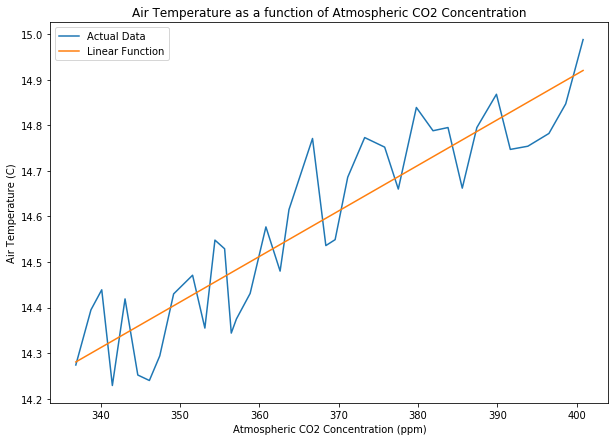

In [44]:
# Graph Air Temperature against CO2 Concentration:
popt_air_temp, pcov_air_temp = curve_fit(linear_func, CO2_abosorbtion_df['Concentration (ppm)'], CO2_abosorbtion_df['Land Annual Temperature (C)'], p0=init_vals)

fig = plt.figure(figsize=(10,7))
plt.plot(CO2_abosorbtion_df['Concentration (ppm)'], CO2_abosorbtion_df['Land Annual Temperature (C)'], label='Actual Data')
plt.plot(CO2_abosorbtion_df['Concentration (ppm)'], linear_func(CO2_abosorbtion_df['Concentration (ppm)'], *popt_air_temp), label='Linear Function')
plt.xlabel('Atmospheric CO2 Concentration (ppm)')
plt.ylabel('Air Temperature (C)')
plt.title('Air Temperature as a function of Atmospheric CO2 Concentration')
plt.legend()

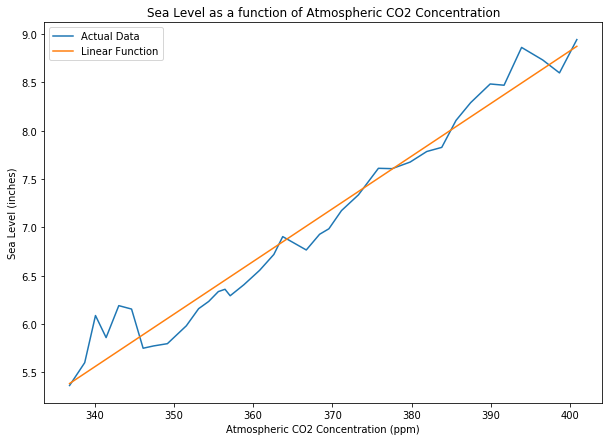

In [45]:
# Graph Sea Level against CO2 Concentration:
popt_sea_level, pcov_sea_level = curve_fit(linear_func, CO2_abosorbtion_df['Concentration (ppm)'], CO2_abosorbtion_df['Sea Level (inches)'], p0=init_vals)

fig = plt.figure(figsize=(10,7))
plt.plot(CO2_abosorbtion_df['Concentration (ppm)'], CO2_abosorbtion_df['Sea Level (inches)'], label='Actual Data')
plt.plot(CO2_abosorbtion_df['Concentration (ppm)'], linear_func(CO2_abosorbtion_df['Concentration (ppm)'], *popt_sea_level), label='Linear Function')
plt.xlabel('Atmospheric CO2 Concentration (ppm)')
plt.ylabel('Sea Level (inches)')
plt.title('Sea Level as a function of Atmospheric CO2 Concentration')
plt.legend()

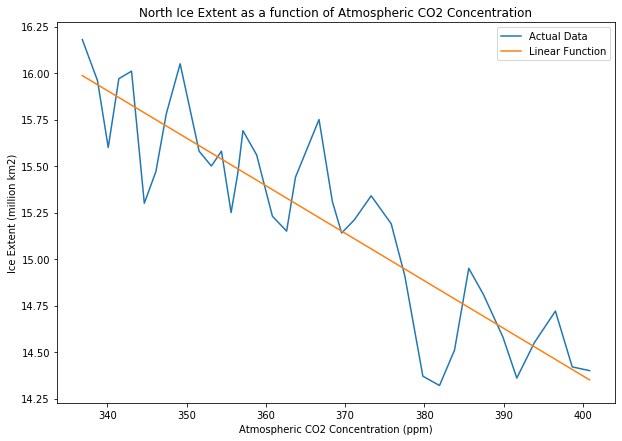

In [46]:
# Graph North Ice Extent against CO2 Concentration:
popt_nor_ie, pcov_nor_ie = curve_fit(linear_func, CO2_abosorbtion_df['Concentration (ppm)'], CO2_abosorbtion_df['February Extent (million km2)'], p0=init_vals)

fig = plt.figure(figsize=(10,7))
plt.plot(CO2_abosorbtion_df['Concentration (ppm)'], CO2_abosorbtion_df['February Extent (million km2)'], label='Actual Data')
plt.plot(CO2_abosorbtion_df['Concentration (ppm)'], linear_func(CO2_abosorbtion_df['Concentration (ppm)'], *popt_nor_ie), label='Linear Function')
plt.xlabel('Atmospheric CO2 Concentration (ppm)')
plt.ylabel('Ice Extent (million km2)')
plt.title('North Ice Extent as a function of Atmospheric CO2 Concentration')
plt.legend()

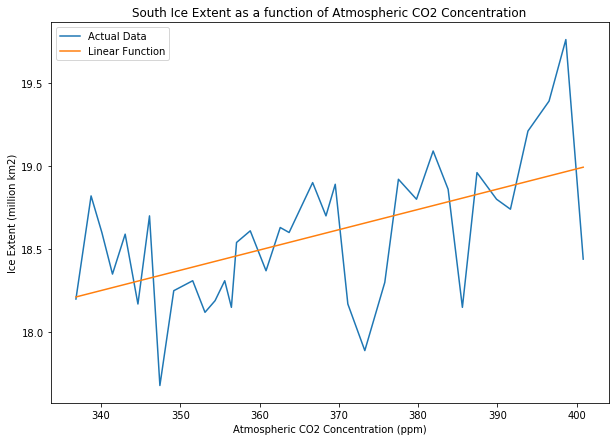

In [47]:
# Graph South Ice Extent against CO2 Concentration:
popt_sou_ie, pcov_sou_ie = curve_fit(linear_func, CO2_abosorbtion_df['Concentration (ppm)'], CO2_abosorbtion_df['September Extent (million km2)'], p0=init_vals)

fig = plt.figure(figsize=(10,7))
plt.plot(CO2_abosorbtion_df['Concentration (ppm)'], CO2_abosorbtion_df['September Extent (million km2)'], label='Actual Data')
plt.plot(CO2_abosorbtion_df['Concentration (ppm)'], linear_func(CO2_abosorbtion_df['Concentration (ppm)'], *popt_sou_ie), label='Linear Function')
plt.xlabel('Atmospheric CO2 Concentration (ppm)')
plt.ylabel('Ice Extent (million km2)')
plt.title('South Ice Extent as a function of Atmospheric CO2 Concentration')
plt.legend()

Future emissions of each sector are predicted using linear functions as well. These functions are dependent upon population projections, which are provided by the United Nations and have already been imported to the notebook.

In [48]:
popt_pop_build, pcov_pop_build = curve_fit(linear_func, pop_emissions['World Population'], pop_emissions['Buildings Contribution to CO2 per Year (Mt)'], p0=init_vals)
popt_pop_other, pcov_pop_other = curve_fit(linear_func, pop_emissions['World Population'], pop_emissions['Other sectors Contribution to CO2 per Year (Mt)'], p0=init_vals)
popt_pop_industry, pcov_pop_industry = curve_fit(linear_func, pop_emissions['World Population'], pop_emissions['Other industrial combustion Contribution to CO2 per Year (Mt)'], p0=init_vals)
popt_pop_power, pcov_pop_power = curve_fit(linear_func, pop_emissions['World Population'], pop_emissions['Power Industry Contribution to CO2 per Year (Mt)'], p0=init_vals)
popt_pop_transport, pcov_pop_transport = curve_fit(linear_func, pop_emissions['World Population'], pop_emissions['Transport Contribution to CO2 per Year (Mt)'], p0=init_vals)

By adding the predictions for the emissions of each sector, predictions for total emissions can be made.

In [49]:
emission_func_params = [popt_pop_build, popt_pop_other, popt_pop_industry, popt_pop_power, popt_pop_transport]

pop_emissions_preds = pd.DataFrame()
for i in range(len(CO2_sectors)):
    pop_emissions_preds[CO2_sectors[i]] = linear_func(population_preds.loc[2020:2070, 'Predicted Population'], *emission_func_params[i])
    
pop_emissions_preds['Total Emissions (Mt)'] = np.sum(pop_emissions_preds, axis=1)

The models and functions created above can be expressed through the following equations:

$$ A_{i} = g(w_{i}) \tag{3}$$

$$ w_{i} = f(C_{i}), pop \tag{4}$$

$$ => A_{i} = g(f(C_{i}), pop) \tag{5}$$


$$ E_{i} = H_{i} - R_{i} \tag{6}$$

By plugging in equations ${5}$ and ${6}$ into equation ${2}$, the following equation is made:

$$ C_{i} = H_{i} - R_{i} - g(f(C_{i}), pop) + C_{i-1} \tag{7}$$

Where,

$ C_{i} $ - The predicted atmospheric CO2 concentration for a given year (ppm).

$ C_{i-1}  $ - The atmospheric CO2 concentration of the previous year (ppm).

$ E_{i}  $ - The predicted CO2 emissions, expressed in an atmospheric CO2 concentration (ppm).

$ A_{i}  $ - The amount of CO2 absorbed from the atmosphere, expressed in an atmospheric CO2 concentration (ppm).

$ w_{i} $ - Vector of features to be input in linear regression model.

$ g() $ - Linear regression model.

$ f() $ - vector of functions to solve for linear regression model input features.

$ pop $ - Global populatino of a given year.

$ H_{i} $ - "Needed" emissions of CO2 for a given year, expressed in an atmospheric CO2 concentration (ppm).

$ R_{i} $ - Projected emissions reductions for a given year, expressed in an atmospheric CO2 concentration (ppm).

In this form, the equation becomes a linear expression where $C_{i}$ can be solved. The code in the cell below solves $C_{i}$ over time.

Note: Values for emissions reductions are taken from the "Energy Technology Perspectives 2020" report created by the IEA. Data from that report has been aggregated, for the purposes of this analysis, by Roy Pigott.

In [50]:
func_parameters = [popt_air_temp, popt_ocean_temp, popt_sea_level, popt_nor_ie, popt_sou_ie]

c_i = symbols('c_i')
concentration_preds_list = []
c_i_minus_1 = co2_concentration.loc[2020, 'Concentration (ppm)']

for i in range(2021,2071):
    population_i = float(population_preds.loc[i,:]) 
    emissions_needs = pop_emissions_preds.loc[i, 'Total Emissions (Mt)']
    emissions_reduction = emission_reduction_data.loc[i, 'Emissions Reductions (Gton)'] * 1000
    if (emissions_needs + emissions_reduction) > 0:
        e_i = added_ppm_molar(emissions_needs + emissions_reduction)
    else:
        e_i = 0
    concentration_expression = c_i + linear_reg_func(*lr.coef_, linear_func(c_i, *popt_air_temp), linear_func(c_i, *popt_ocean_temp), linear_func(c_i, *popt_sea_level), population_i, linear_func(c_i, *popt_nor_ie), linear_func(c_i, *popt_sou_ie), c_i, lr.intercept_) - c_i_minus_1 - e_i

    c_i_solve = solve(concentration_expression)
    c_i_minus_1 = c_i_solve[0]
    concentration_preds_list.append(c_i_solve[0])

concentration_preds = pd.concat([pd.Series(concentration_preds_list), pd.Series(range(2021,2071))], axis=1)
concentration_preds.columns = ['Atmoshperic CO2 Concentration Predictions (ppm)', 'Year']
concentration_preds.set_index('Year', inplace=True)

Predicted Year of Stability: 2052


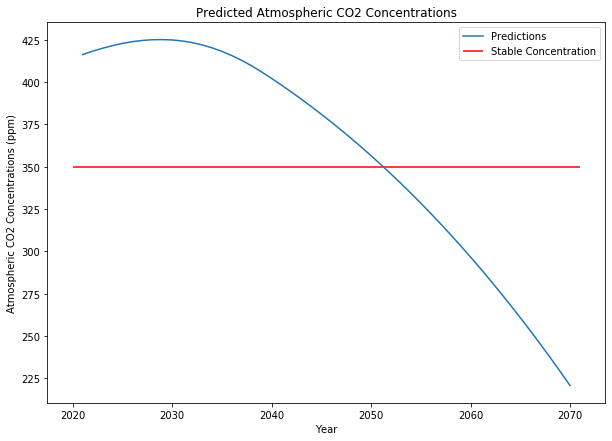

In [51]:
fig = plt.figure(figsize=(10,7))

plt.plot(concentration_preds.index, concentration_preds['Atmoshperic CO2 Concentration Predictions (ppm)'], label='Predictions')
plt.hlines(350, 2020, 2071, colors='red', label='Stable Concentration')
plt.title('Predicted Atmospheric CO2 Concentrations')
plt.xlabel('Year')
plt.ylabel('Atmospheric CO2 Concentrations (ppm)')
plt.legend()

def find_stable_year(df):
    for i in df['Atmoshperic CO2 Concentration Predictions (ppm)']:
        if i <= 350:
            return df.loc[df['Atmoshperic CO2 Concentration Predictions (ppm)'] == i].index[0]
        
print("Predicted Year of Stability: " + str(find_stable_year(concentration_preds)))

Based on the results of the model, there may be a chance that, with the implementation of a sustainable technologies and policies, to bring the concentration of CO2 in the atmosphere down to the stable level of 350 ppm by the year 2052. 

Although this may presents a fairly optimistic outlook for the future, there are some limitations of the model that should be acknowledged:

* The projected reductions are highly optimistic and are not indicative of current trend in CO2 emission reduction improvements.
* The linear model and functions used in this analysis are very simple and only a basic approximation for the predicted CO2 concentration values. The Earth's climate system is extremely complex and even the most sophisticated models have a high degree of uncertainty [27].
* As a result of the simplicity of the model, the error of future predictions can become quite large, especially when compounded with the error of previous predictions. 

Ultimately, if nothing or very little is done about climate change, it is fairly certain that the planet will face devastating consequences. Even with the high degree of uncertainty this analysis presents, it still provides an indication that it may be possible to lower atmospheric CO2 concentrations, which would greatly aid in the fight against climate change. We must attempt to reach this goal to preserve the future of our planet. 

## References

[1] Estimated Global Land-Surface TAVG based on the Complete Berkeley Dataset, Berkeley Earth, 06-Jan-2021, http://berkeleyearth.org/archive/data/

[2] Estimated Global Land-Surface TMIN based on the Complete Berkeley Dataset, Berkeley Earth, 11-Sep-2020, http://berkeleyearth.org/archive/data/

[3] Estimated Global Land-Surface TMAX based on the Complete Berkeley Dataset, Berkeley Earth, 17-Nov-2020, http://berkeleyearth.org/archive/data/

[4] Land + Ocean (1850 – Recent), Berkeley Earth, 10-Nov-2020, http://berkeleyearth.org/archive/data/

[5] Crippa, M., Guizzardi, D., Muntean, M., Schaaf, E., Solazzo, E., Monforti-Ferrario, F., Olivier, J.G.J., Vignati, E., Fossil CO2 emissions of all world countries - 2020 Report, EUR 30358 EN, Publications Office of the European Union, Luxembourg, 2020, ISBN 978-92-76-21515-8, doi:10.2760/143674, JRC121460.

[6] Dr. Pieter Tans, NOAA/GML (www.esrl.noaa.gov/gmd/ccgg/trends/) and Dr. Ralph Keeling, Scripps Institution of Oceanography (scrippsco2.ucsd.edu/), Trends in Atmospheric Carbon Dioxide
 
[7] United Nations, Department of Economic and Social Affairs, Population Division (2019). World Population Prospects 2019, Online Edition. Rev. 1.

[8] CSIRO (Commonwealth Scientific and Industrial Research Organisation). 2015 update to data originally published in: Church, J.A., and N.J. White. 2011. Sea-level rise from the late 19th to the early 21st century. Surv. Geophys. 32:585–602. www.cmar.csiro.au/sealevel/sl_data_cmar.html.

[9] NOAA (National Oceanic and Atmospheric Administration). 2016. Laboratory for Satellite Altimetry: Sea level rise. Accessed June 2016. www.star.nesdis.noaa.gov/sod/lsa/SeaLevelRise/LSA_SLR_timeseries_global.php.

[10] IEA (2020), Energy Technology Perspectives 2020, IEA, Paris https://www.iea.org/reports/energy-technology-perspectives-2020

[11] Melissa Denchak, Are the Effects of Global Warming Really that Bad?, Natural Resources Defense Council, 15-MAR-2016, https://www.nrdc.org/stories/are-effects-global-warming-really-bad

[12] Climate Change Causes Habitat Loss and Species Extinction, Environment and Ecology, http://environment-ecology.com/climate-change/818-climate-change-causes-habitat-loss-and-species-extinction.html

[13] NOAA, How does sea ice affect global climate?, 26-FEB-2021, https://oceanservice.noaa.gov/facts/sea-ice-climate.html 

[14] Lorin Hancock, Why are glaciers and sea ice melting?, World Wide Fund for Nature, https://www.worldwildlife.org/pages/why-are-glaciers-and-sea-ice-melting

[15] Worldometers.info, CO2 Emissions, https://www.worldometers.info/co2-emissions/

[16] Kevin E. Trenberth, Lesley Smith, The Mass of the Atmosphere: A Constraint on Global Analyses, Journal of Climate, 15 Mar 2005, https://journals.ametsoc.org/view/journals/clim/18/6/jcli-3299.1.xml

[17] Detlev Möller: Luft: Chemie, Physik, Biologie, Reinhaltung, Recht. Walter de Gruyter, 2003, ISBN 3-11-016431-0, S. 173.

[18] Christina Nunez, Sea level rise, explained, National Geographic, 19-FEB-2019, https://www.nationalgeographic.com/environment/article/sea-level-rise-1

[19] Robert Muggah, The world’s coastal cities are going under. Here’s how some are fighting back, World Economic Fourm, 16-JAN-2019, https://www.weforum.org/agenda/2019/01/the-world-s-coastal-cities-are-going-under-here-is-how-some-are-fighting-back/

[20] Fetterer, F., K. Knowles, W. N. Meier, M. Savoie, and A. K. Windnagel. 2017, updated daily. Sea Ice Index, Version 3. . Boulder, Colorado USA. NSIDC: National Snow and Ice Data Center. doi: https://doi.org/10.7265/N5K072F8. Date Accessed 01/01/2021.

[21] Thermodynamics: Melt, National Snow and Ice Data Center, 3-APR-2020, https://nsidc.org/cryosphere/seaice/processes/thermodynamic_melt.html

[22] Why is Arctic sea ice decreasing while Antarctic sea ice is not?, The Royal Society, March 2020, https://royalsociety.org/topics-policy/projects/climate-change-evidence-causes/question-12/

[23] Wikipedia contributors. (2021, February 10). Carbon sink. In Wikipedia, The Free Encyclopedia. Retrieved 14:30, February 26, 2021, from https://en.wikipedia.org/w/index.php?title=Carbon_sink&oldid=1005943003

[24] Aparna Vidyasagar, What Is Photosynthesis?, Live Science, 15-OCT-2018, https://www.livescience.com/51720-photosynthesis.html

[25] How the oceans absorb carbon dioxide is critical for predicting climate change, National Oceanic and Atmospheric Administration, https://www.pmel.noaa.gov/co2/story/Ocean+Carbon+Uptake

[26] Nicola Jones, How the World Passed a Carbon Threshold and Why It Matters, Yale School of the Environment, 26-JAN-2017, https://e360.yale.edu/features/how-the-world-passed-a-carbon-threshold-400ppm-and-why-it-matters

[27] Ed Hawkins, Sources of uncertainty in CMIP5 projections, Climate Lab Book, 4-NOV-2013, https://www.climate-lab-book.ac.uk/2013/sources-of-uncertainty/